### 1. Explore this dataset using what you have learned in data preprocessing and data visualization 

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#basic eda packages
from matplotlib import pyplot as plt
import seaborn as sns
#models 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import sklearn.metrics as metrics

df=pd.read_csv("kc_house_data.csv",encoding="ISO-8859-1")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### 2. Feature Selection is one of the core concepts in machine learning which hugely impacts the performance of your model. The data features that you use to train your machine learning models have a huge influence on the performance you can achieve.

### Data Cleaning

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
pd.DataFrame(df.isna().sum()).T

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Here their are no null values found!!

In [8]:
features = [ 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']
X = df[features]
Y = df['price']

### 3. Split your dataset into a training set and a testing set.

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(X , Y , test_size= 0.2)

In [10]:
x_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4833,3,1.00,1600,5000,1.5,0,0,3,7,1110,490,1947,0,98107,47.6550,-122.358,1380,5000
5875,3,1.75,2100,5058,1.0,0,2,3,7,1340,760,1941,0,98126,47.5743,-122.378,1640,5000
4474,3,4.00,4380,42769,2.0,0,0,5,11,4380,0,1983,0,98052,47.7167,-122.109,3630,35425
19724,4,2.75,3430,6500,2.0,0,0,3,9,3050,380,2006,0,98052,47.7079,-122.106,3070,6802
14243,3,1.75,920,3600,1.0,0,0,4,6,820,100,1904,0,98119,47.6386,-122.365,1620,3600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12950,3,1.75,1628,286355,1.0,0,0,3,7,1628,0,1996,0,98092,47.2558,-122.122,1490,216344
5930,4,2.50,2200,7719,2.0,0,0,3,8,2200,0,2000,0,98030,47.3649,-122.194,2460,7348
2661,3,2.50,1740,10050,2.0,0,0,3,7,1740,0,1989,0,98001,47.2671,-122.236,1300,10125
6720,2,1.00,910,9000,1.0,0,0,3,5,910,0,1923,0,98065,47.5260,-121.810,1290,9000


In [11]:
x_train.head() ### showing X_train Headers

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
4833,3,1.00,1600,5000,1.5,0,0,3,7,1110,490,1947,0,98107,47.6550,-122.358,1380,5000
5875,3,1.75,2100,5058,1.0,0,2,3,7,1340,760,1941,0,98126,47.5743,-122.378,1640,5000
4474,3,4.00,4380,42769,2.0,0,0,5,11,4380,0,1983,0,98052,47.7167,-122.109,3630,35425
19724,4,2.75,3430,6500,2.0,0,0,3,9,3050,380,2006,0,98052,47.7079,-122.106,3070,6802
14243,3,1.75,920,3600,1.0,0,0,4,6,820,100,1904,0,98119,47.6386,-122.365,1620,3600


### 4. Apply Linear regression to your training set. 

In [13]:
model = LinearRegression() #build linear regression model
model.fit(x_train , y_train) #fitting the test data

LinearRegression()

In [14]:
y_pred = model.predict(x_test)

In [15]:
mse = mean_squared_error(y_pred , y_test)
score = r2_score(y_test, y_pred)

print("MSE : ",mse)
print("Score : ",score)

MSE :  44385205250.459015
Score :  0.7084426988832857


In [16]:
model.intercept_  #checking coefficients, train and test 

3869198.3445204473

In [17]:
model.coef_

array([-3.32118435e+04,  4.04931300e+04,  1.03235079e+02,  1.56846748e-01,
        5.16452827e+03,  5.65691353e+05,  5.18715337e+04,  2.70041796e+04,
        9.60550229e+04,  7.07251153e+01,  3.25099637e+01, -2.56996323e+03,
        1.94202876e+01, -5.56207226e+02,  6.03252523e+05, -2.15707091e+05,
        2.90704451e+01, -3.74745579e-01])

In [18]:
x_train, x_test , y_train, y_test = train_test_split(df['sqft_living'] , Y , test_size= 0.2)
x_train=np.array(x_train).reshape(-1,1)
x_test=np.array(x_test).reshape(-1,1)
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)

In [19]:
model = LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_pred , y_test)
score = r2_score(y_test, y_pred)

print("MSE : ",mse)
print("Score : ",score)

MSE :  73029913436.99408
Score :  0.4961804867615306


### Here  the mse is great than 0.8 it means we can use this  model to solve the linear regression and maen squared error rate is also low

### 5. Plot the linear regression. 

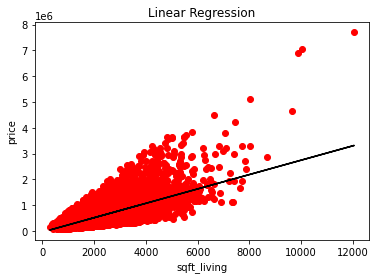

In [20]:
plt.scatter(x_train,y_train,color="r")
plt.title("Linear Regression")
plt.ylabel("price")
plt.xlabel("sqft_living")
plt.plot(x_train,model.predict(x_train),color="k")
plt.show()

### With this plot we can see the concentration off the price  between 0-2000, to 6000 

### 5. linear regression using the testing set. 

In [84]:
model=LinearRegression()   #build linear regression model
model.fit(x_test,y_test)  #fitting the test data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 38019819174.4321
R squared 0.7047034462553994


### The result tel us that we can use this model to solve the linear regression and maen squared error rate is also low

### 6. Apply multi-linear regression and compare it to the linear model. 

In [42]:
#extract x and y from our data
x=df[["sqft_living","bathrooms", "sqft_above", ]]  #we have more than one input
y=df["price"].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35, random_state=40) #splitting data with test size of 35%

model=LinearRegression() #build linear regression model
model.fit(x_train,y_train) #fitting the training data
predicted=model.predict(x_test) #testing our model’s performance

print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

MSE 62861392734.23036
R squared 0.4999791006544255


### The mse is great than 0.8 it means we can use this model to solve the linear regression and maen squared error rate is also low

### 7. Apply Polynomial regression and compare it to linear and multilinear regression. 

In [48]:
model = LinearRegression()
poly = PolynomialFeatures(degree=4)
poly.fit_transform(x_train)

model.fit(x_train , y_train)
poly.fit_transform(x_test)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_pred , y_test)
score = r2_score(y_test, y_pred)
print("MSE : ",mse)
print("Score : ",score)

MSE :  62861392734.23036
Score :  0.4999791006544255


### For all model
More you add veriable  more  the score goses up and is great than 0.4 it means we can use this model to solve the linear regression and maen squared error rate is also low